In [9]:
import torch
import numpy as np
from torchvision.models.detection import retinanet_resnet50_fpn_v2, RetinaNet_ResNet50_FPN_V2_Weights
from PIL import Image, ExifTags
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [12]:
device = torch.device('cuda:0')
model=retinanet_resnet50_fpn_v2(weights=RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT).to(device)
preprocess=RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT.transforms().to(device)
model.eval()
image=img=Image.open('/run/media/amol447/54B63A3EB63A2142/Abha_mobile_backup/IMG_2795.JPG')


True

In [13]:
img_processed=preprocess(image).to(torch.device('cuda:0'))
predictions=model([img_processed])


In [14]:
from torchvision.utils import draw_bounding_boxes


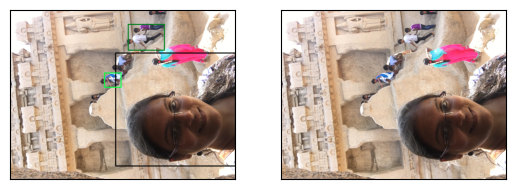

In [15]:
img_with_boxes=draw_bounding_boxes(img_processed,predictions[0]['boxes'][0:3],width=12)
show([img_with_boxes,img_processed])

In [16]:
exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }

In [17]:
exif

{'ResolutionUnit': 2,
 'ExifOffset': 192,
 'Make': 'Apple',
 'Model': 'iPhone 6s',
 'Software': '10.2',
 'Orientation': 6,
 'DateTime': '2017:01:28 12:50:14',
 'YCbCrPositioning': 1,
 'XResolution': 72.0,
 'YResolution': 72.0,
 'ExifVersion': b'0221',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ShutterSpeedValue': 7.8892251815980625,
 'DateTimeOriginal': '2017:01:28 12:50:14',
 'DateTimeDigitized': '2017:01:28 12:50:14',
 'ApertureValue': 2.2750071245369052,
 'BrightnessValue': 7.457401812688822,
 'ExposureBiasValue': 0.0,
 'MeteringMode': 5,
 'Flash': 24,
 'FocalLength': 2.65,
 'ColorSpace': 1,
 'ExifImageWidth': 2576,
 'FocalLengthIn35mmFilm': 31,
 'SceneCaptureType': 0,
 'ExifImageHeight': 1932,
 'SubsecTimeOriginal': '451',
 'SubsecTimeDigitized': '451',
 'SensingMethod': 2,
 'ExposureTime': 0.004219409282700422,
 'FNumber': 2.2,
 'SceneType': b'\x01',
 'ExposureProgram': 2,
 'CustomRendered': 4,
 'ISOSpeedRatings': 32,
 'ExposureMode': 0,
 'FlashPixVersion': b'0100',
 'Whit